#Deep Embedded Clustering Updating

We update the clustering by telling the model which cluster with the right label is nearest to each subject. Originally we were assigning a binary label, simply whether or not a subject is a muon. Each subject is assigned a label for the nearest cluster that matches the expected label from volunteers. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import os
import click
import pickle

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import optimizers

from muon.deep_clustering.clustering import Config, Cluster
from muon.deep_clustering.mapping2 import Mapping
import muon.deep_clustering.supervised as supervised_
from muon.deep_clustering.dec_updating import DEC_Updater
import muon.deep_clustering.utils as utils
import muon.project.parse_export as pe

import logging
logger = logging.getLogger(__name__)

_config = 'mnt/dec/dec_no_labels/config_jupyter.json'
train = utils.load_set('mnt/training_set/train.csv')
validate = utils.load_set('mnt/training_set/test.csv')

config = Config.load(_config)
print(config.__dict__)
subjects = pickle.load(open(config.subjects, 'rb'))

labels = pe.Aggregate.load('mh2')
truth = pe.Aggregate.load('mh2_gold')
_labels = labels.subject_labels(), truth.subject_labels()

subjects = subjects.subset(truth.labeled_subjects())
truth.apply_labels(subjects)

cluster = Cluster.create(subjects, config)
cluster.initialize()
mapping = DEC_Updater(cluster, *_labels, train, validate, 0.95)

optimizer = optimizers.SGD(lr=0.5)
mapping.init_model('categorical_crossentropy', optimizer)
print(mapping.scores)


Using TensorFlow backend.


{'lr': 0.01, 'maxiter': 20000.0, 'subjects': 'mnt/dec/dec_no_labels/subjects.pkl', 'nodes': [500, 500, 2000, 10], 'n_clusters': 50, 'rotation': False, 'momentum': 0.9, 'save_dir': 'mnt/dec/dec_no_labels', 'tol': 0.001, 'batch_size': 256, 'ae_weights': 'mnt/dec/dec_no_labels/ae_weights.h5', 'update_interval': 140}


/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[{'train': {'f1_score': 0.83361588762412209, 'recall': 0.00038865137971239797, 'precision': 1.0}, 'validate': {'f1_score': 0.84167237834132969, 'recall': 0, 'precision': 0}}]


/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


,n_assigned,majority_class,majority_class_fraction
1,100,0,0.770000
2,100,1,1.000000
3,167,0,0.952096
4,100,0,0.850000
5,100,0,0.940000
6,100,0,0.980000
7,100,0,0.990000
8,100,1,0.710000
9,500,0,0.894000
10,198,0,0.828283


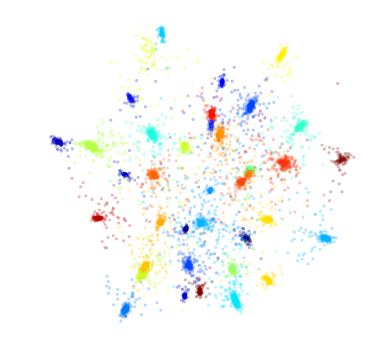

In [2]:
display(mapping.cluster_mapping())
mapping.pca_plot()
plt.show()

Clustering was run for the following cells with the stochastic gradient descent optimizer with a 0.1 learning rate

/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


,n_assigned,majority_class,majority_class_fraction
0,6863,0,0.914760
1,2763,1,0.972494
6,93,1,0.677419
8,3,1,0.666667
9,83,1,0.807229
12,16,1,1.000000
14,5,1,0.800000
17,5,1,0.600000
25,57,1,0.684211
26,7,1,1.000000


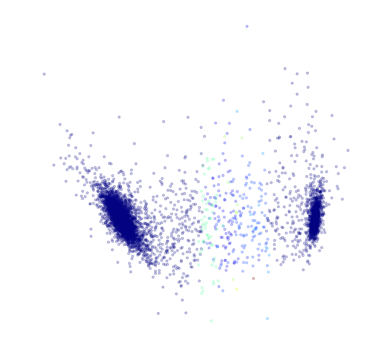

In [3]:
mapping.model.load_weights('weights/dec_updating_weights_2.h5')
mapping.score()
display(mapping.cluster_mapping())
mapping.pca_plot()
plt.show()

Clustering was run for the following cells with the stochastic gradient descent optimizer with a 0.05 learning rate

/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


,n_assigned,majority_class,majority_class_fraction
0,6804,0,0.921958
1,2888,1,0.966413
6,63,1,0.714286
8,1,0,1.000000
9,85,1,0.800000
12,9,1,0.888889
14,4,1,1.000000
17,4,1,1.000000
25,37,1,0.567568
26,1,1,1.000000


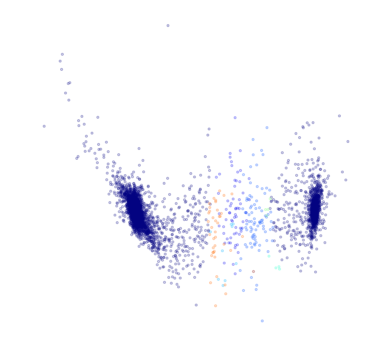

In [4]:
mapping.model.load_weights('weights/dec_updating_weights_3.h5')
mapping.score()
display(mapping.cluster_mapping())
mapping.pca_plot()
plt.show()

Load weights from DEC updating script with 0.05 learn rate

In [5]:
display(utils.pd_scores(mapping.scores))

,t_precision,t_recall,t_f1,v_precision,v_recall,v_f1
0,1.000000,0.000389,0.833616,0.000000,0.000000,0.841672
1,0.950361,0.870579,0.971918,0.950202,0.783574,0.922403
2,0.950127,0.873688,0.984141,0.950135,0.782464,0.930864


Tried running the mapping layer again with the SGD optimizer and a small learning rate. Better performance than before, but it takes a long time to converge (still hasn't converged now, 10hrs later). The dec updating algorithm converged in less than an hour.

/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


,n_assigned,majority_class,majority_class_fraction
1,129,0,0.961240
2,139,1,0.985612
3,256,0,0.964844
4,95,0,0.947368
5,95,0,1.000000
6,98,0,0.979592
7,103,0,0.961165
8,105,1,0.771429
9,444,0,0.988739
10,176,0,0.982955


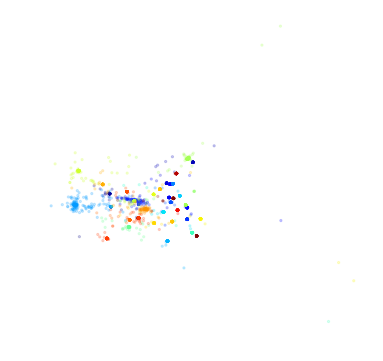

,t_precision,t_recall,t_f1,v_precision,v_recall,v_f1
0,0.950027,0.694520,0.833616,0.950365,0.722531,0.841672
1,0.950000,0.915663,0.982112,0.950055,0.950055,0.984262


In [4]:
cluster = Cluster.create(subjects, config)
cluster.initialize()
mapping = Mapping(cluster, *_labels, train, validate, 0.95)

optimizer = optimizers.SGD(lr=0.5)
mapping.init_model('categorical_crossentropy', optimizer)
mapping.model.load_weights('weights/checkpoint_2.h5')
mapping.score()
display(mapping.cluster_mapping())
mapping.pca_plot()
plt.show()
display(utils.pd_scores(mapping.scores))

In [3]:
def f(config):
    def load_subjects(config):
        fname = config.subjects
        with open(fname, 'rb') as file:
            subjects = pickle.load(file)
        logger.info('Done loading subjects')

        agg = pe.Aggregate.load(config.label_source)
        _s = list(agg.data['subjects'].keys())
        subjects = subjects.subset(_s)
        agg.apply_labels(subjects)
        return subjects

    config = supervised_.Config.load(config)
    config.rotation = False
    print(config)
    subjects = load_subjects(config)
    model = supervised_.Supervised.load(config)
    return model.score(subjects)

display(utils.pd_scores([f('mnt/dec/supervised_1/config.json')]))

{'save_dir': '/home/larai002/Zooniverse/repos/MuonHunterClassification/Data/dec/supervised_1', 'patience': 10, 'epochs': 100, 'subjects': '/home/larai002/Zooniverse/repos/MuonHunterClassification/Data/dec/supervised_1/subjects.pkl', 'loss': 'categorical_crossentropy', 'rotation': False, 'checkpoint': './checkpoint_model.h5', 'label_source': 'mh2_gold', 'lr': None, 'optimizer': 'adam', 'input_shape': [9897, 499], 'ae_weights': '/home/larai002/Zooniverse/repos/MuonHunterClassification/Data/dec/supervised_1/ae_weights.h5'}


INFO:__main__:Done loading subjects
DEBUG:muon.deep_clustering.supervised:xy: {'train': (array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.13406561, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32), array([0, 1, 0, ..., 0, 1, 1])), 'validate': (array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  

,t_precision,t_recall,t_f1,v_precision,v_recall,v_f1
0,0.950148,1.0,0.998446,0.950509,0.72475,0.862396


Baseline scores if we give Hugh's gold standard classifications to a softmax layer